<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

## **Tugas *3*: *Regresi***

### **Tenggat Waktu: 18 November 2021, 23.55 WIB**
</center>

#### **Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama.ipynb**. Contoh: F_Tugas1_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **18 November 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [840]:
# Isi dengan data diri Anda
NAMA = "Fahdii Ajmalal Fikrie"
KELAS = "D"
NPM = "1906398370"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = [
    "Hugo Irwanto: ngasih tau kalo geography didrop dan binnedInc di encode",
    "Fairuza Raryasdya dan Radhiansya Zain: bertanya mengenai pendekatan dalam memproses outlier"
]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
    "https://stackoverflow.com/questions/59742169/what-is-the-parameter-alpha-in-ridge-regression",
    "https://stackoverflow.com/questions/59706137/what-is-alpha-in-ridge-regression",
    "https://www.pluralsight.com/guides/linear-lasso-and-ridge-regression-with-r",
    "https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a",
    "https://medium.com/@lily_su/logistic-regression-accuracy-cross-validation-58d9eb58d6e6"
]

In [841]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Fahdii Ajmalal Fikrie dari kelas D dengan NPM 1906398370, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Fahdii Ajmalal Fikrie)


In [842]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import (
    LinearRegression, Ridge,
    Lasso, LogisticRegression,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

from IPython.display import display
from pprint import pprint

## **Preprocessing**

### Nomor 1
[10] Berikan ringkasan mengenai data tersebut terkait dengan deskripsi setiap atribut, jumlah atribut (numerik & kategorik), jumlah missing values, jumlah duplikasi data, dan kemungkinan adanya outliers pada data!

In [843]:
# Mengimpor dataset
cancer_df = pd.read_csv("cancer_reg.csv")
cancer_df.head(5)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_logistic,TARGET_softmax
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,1,2
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,1,2
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,1,2
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,2,3
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,1,1


In [844]:
# Deskripsi setiap atribut/fitur
print("Deskripsi setiap atribut/fitur: \n")
cancer_df.info()

Deskripsi setiap atribut/fitur: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   flo

In [845]:
# Deskripsi dan jumlah masing-masing atribut numerik
print("Deskripsi dan jumlah masing-masing atribut numerik: \n")
cancer_df.describe()

Deskripsi dan jumlah masing-masing atribut numerik: 



,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_logistic,TARGET_softmax
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306,1.467017,2.084345
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816,0.498993,0.737185
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,1.000000,1.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419,1.000000,2.000000
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478,1.000000,2.000000
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677,2.000000,3.000000
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165,2.000000,3.000000


In [846]:
# Deskripsi dan jumlah masing-masing atribut kategorik
print("Deskripsi dan jumlah masing-masing atribut kategorik: \n")
cancer_df.describe(include=np)

Deskripsi dan jumlah masing-masing atribut kategorik: 



,binnedInc,Geography
count,3047,3047
unique,10,3047
top,"(54545.6, 61494.5]","Kitsap County, Washington"
freq,306,1


In [847]:
def cek_null(df):
    """
    Fungsi untuk mengecek null/missing value
    Courtesy Tutorial Lab 3
    """
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

# Mengecek missing value pada cancer_df
print("Missing value pada cancer_df: \n")
cek_null(cancer_df)

Missing value pada cancer_df: 

                         Total   Percent
PctSomeCol18_24           2285  0.749918
PctPrivateCoverageAlone    609  0.199869
PctEmployed16_Over         152  0.049885


In [848]:
# Menghitung jumlah duplicates pada setiap kolom
print("Jumlah duplicates pada cancer_df: \n")
cancer_df.duplicated(keep=False).sum()

Jumlah duplicates pada cancer_df: 



0

In [849]:
# Menghitung jumlah outliers pada setiap kolom
Q1 = cancer_df.quantile(0.25)
Q3 = cancer_df.quantile(0.75)
IQR = Q3 - Q1

print("Jumlah outliers pada setiap atribut/kolom: \n")
display(cancer_df.shape)
outlier_data = ((cancer_df < (Q1 - 1.5 * IQR)) | (cancer_df > (Q3 + 1.5 * IQR))).sum()
pprint(outlier_data)

Jumlah outliers pada setiap atribut/kolom: 



(3047, 36)

AvgHouseholdSize           201
BirthRate                  164
Geography                    0
MedianAge                   93
MedianAgeFemale             78
MedianAgeMale               89
PctAsian                   323
PctBachDeg18_24             94
PctBachDeg25_Over           82
PctBlack                   395
PctEmpPrivCoverage           9
PctEmployed16_Over          20
PctHS18_24                  52
PctHS25_Over                31
PctMarriedHouseholds       100
PctNoHS18_24                69
PctOtherRace               297
PctPrivateCoverage          21
PctPrivateCoverageAlone      4
PctPublicCoverage           18
PctPublicCoverageAlone      36
PctSomeCol18_24             31
PctUnemployed16_Over        68
PctWhite                   174
PercentMarried              68
TARGET_deathRate            64
TARGET_logistic              0
TARGET_softmax               0
avgAnnCount                461
avgDeathsPerYear           349
binnedInc                    0
incidenceRate               93
medIncom

/var/folders/4y/f7n6cknn4dd3pvy303271wjh0000gn/T/ipykernel_94215/3522142349.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_data = ((cancer_df < (Q1 - 1.5 * IQR)) | (cancer_df > (Q3 + 1.5 * IQR))).sum()


### Nomor 2
[5] Berdasarkan eksplorasi anda pada nomor 1, lakukan data preparation hingga data tersebut menurut anda cukup “clean” dan dapat memberikan hasil regresi yang maksimal.

**Memproses null/missing value**

Missing value ditemukan pada tiga kolom, yaitu `PctSomeCol18_24`, `PctPrivateCoverageAlone`, `PctEmployed16_Over`.

Pada fitur `PctSomeCol18_24`, akan didrop karena nilai missing value yang besar (77%). Untuk sisanya, pendekatan processing untuk missing value yang dipilih adalah pendekatan data imputation dengan menggunakan mean.

In [850]:
# Mendrop kolom PctSomeCol18_24
cancer_df_processed = cancer_df.copy(deep=True)
cancer_df_processed = cancer_df_processed.drop(['PctSomeCol18_24'], axis=1)

# Data imputation w/ Mean untuk kolom PctPrivateCoverageAlone dan PctEmployed16_Over
cancer_df_processed['PctPrivateCoverageAlone'].fillna((
    cancer_df_processed['PctPrivateCoverageAlone'].mean()),
    inplace=True
)
cancer_df_processed['PctEmployed16_Over'].fillna((
    cancer_df_processed['PctEmployed16_Over'].mean()),
    inplace=True
)

print("Kolom dengan NaN/Missing Value setelah diproses: \n")
cek_null(cancer_df_processed)
display(cancer_df_processed.shape)

Kolom dengan NaN/Missing Value setelah diproses: 

Empty DataFrame
Columns: [Total, Percent]
Index: []


(3047, 35)

**Special Treatment untuk Geography dan binnedInc**

In [851]:
cancer_df_processed = cancer_df_processed.drop(['Geography'], axis=1)

label_encoder = LabelEncoder()
cancer_df_processed['binnedInc'] = label_encoder.fit_transform(cancer_df_processed['binnedInc'])

**Memproses Outlier**

Melihat dari data outlier di atas, terdapat 3 outlier yang nilainya besar (di atas 15%), yaitu `studyPerCap` dan `avgAnnCount`. Maka, kedua kolom tersebut akan didrop agar mempertahankan row pada kolom yang lainnya.

In [852]:
cancer_df_processed = cancer_df_processed.drop(['studyPerCap', 'avgAnnCount'], axis=1)

print("Data jumlah outliers masing-masing kolom setelah diproses: \n")
outlier_data = ((cancer_df_processed < (Q1 - 1.5 * IQR)) | (cancer_df_processed > (Q3 + 1.5 * IQR))).sum()
display(outlier_data)
display(cancer_df_processed.shape)

Data jumlah outliers masing-masing kolom setelah diproses: 



/var/folders/4y/f7n6cknn4dd3pvy303271wjh0000gn/T/ipykernel_94215/3791826523.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_data = ((cancer_df_processed < (Q1 - 1.5 * IQR)) | (cancer_df_processed > (Q3 + 1.5 * IQR))).sum()


AvgHouseholdSize           201
BirthRate                  164
MedianAge                   93
MedianAgeFemale             78
MedianAgeMale               89
PctAsian                   323
PctBachDeg18_24             94
PctBachDeg25_Over           82
PctBlack                   395
PctEmpPrivCoverage           9
PctEmployed16_Over          20
PctHS18_24                  52
PctHS25_Over                31
PctMarriedHouseholds       100
PctNoHS18_24                69
PctOtherRace               297
PctPrivateCoverage          21
PctPrivateCoverageAlone      4
PctPublicCoverage           18
PctPublicCoverageAlone      36
PctSomeCol18_24              0
PctUnemployed16_Over        68
PctWhite                   174
PercentMarried              68
TARGET_deathRate            64
TARGET_logistic              0
TARGET_softmax               0
avgAnnCount                  0
avgDeathsPerYear           349
binnedInc                    0
incidenceRate               93
medIncome                  122
popEst20

(3047, 32)

~~Jadi ngurang setengah datasetnya :(~~

### Nomor 3
[10] Menurut Anda, apakah perlu dilakukan normalisasi terhadap data sebelum pemrosesan lebih lanjut, atau cukup menggunakan data asli? Jika ya, bentuk normalisasi apa yang tepat digunakan pada data? Jelaskan secara singkat alasan Anda!

Dalam kasus ini, normalisasi akan berguna untuk mensejajarkan nilai antar atribut numerik yang mana terjadi ketimpangan pada antar kolomnya.

Berdasarkan hasil preprocessing di atas (meskipun sudah dilakukan preprop, tapi masih ada outliers di beberapa kolom meskipun tidak dominan), pendekatan normalisasi yang paling cocok adalah `StandardScaler` sebagaimana yang tertera pada penjelasan use case masing-masing normalisasi di Tutorial Lab 3.

In [853]:
# Mengekstrak target dari cancer_df_preprocessed
cancer_df_processed_no_target = cancer_df_processed.drop(['TARGET_deathRate', 'TARGET_logistic', 'TARGET_softmax'], axis=1)

standard_scaler = StandardScaler()
cancer_std = standard_scaler.fit_transform(cancer_df_processed_no_target)

In [854]:
cancer_df_normalized = pd.DataFrame(cancer_std, columns=cancer_df_processed_no_target.columns)
display(cancer_df_normalized.head(5))

,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,0.561518,0.761321,1.232312,0.478696,-0.886102,1.218383,-0.131848,-0.511128,-0.084151,0.140614,...,0.000000,0.042734,-0.427608,-0.857336,-0.113862,-0.448196,1.367088,-0.039818,0.245324,0.241011
1,-0.230067,-0.672179,0.088363,-0.180448,0.268698,0.173418,-0.270930,-1.410622,-1.595872,-0.325473,...,0.592879,0.254461,-0.657187,-0.644641,0.340912,-0.560060,0.380201,0.499790,-0.893428,-0.658382
2,-0.269746,-1.806881,0.189790,-0.248055,-0.355519,0.173418,-0.006012,0.847682,0.690607,0.327049,...,-0.549357,-0.666550,0.745793,0.304306,0.444328,-0.575848,-0.301959,0.217176,0.487085,-0.962391
3,0.031811,-0.327553,-0.234279,-0.081322,0.034617,-0.523226,-0.054580,0.503195,0.237090,0.094006,...,-0.904226,-0.655964,1.153933,0.942391,0.494549,-0.572892,-0.035483,-0.176530,-0.033835,-0.522020
4,-0.317360,-1.799549,0.240214,-0.280592,-0.683232,0.173418,0.066840,1.574933,1.276399,-0.325473,...,-0.504998,-0.645377,0.988126,0.566084,0.638610,-0.608154,-0.225352,-0.424035,0.423570,0.582401


## **Regresi**
(Penggunaan library diperbolehkan). Gunakan TARGET_deathRate sebagai kolom target.

In [855]:
# Mengekstrak data dan target/label
label = cancer_df_processed[['TARGET_deathRate']]
data = cancer_df_normalized

display(data)

# Membagi dataset menjadi training set dan test set
# dengan jumlah training set adalah sebanyak 80% dari data keseluruhan
data_train, data_test, label_train, label_test = train_test_split(data, label, train_size=0.8)

,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,0.561518,0.761321,1.232312,0.478696,-0.886102,1.218383,-0.131848,-0.511128,-0.084151,0.140614,...,0.000000,0.042734,-0.427608,-0.857336,-0.113862,-0.448196,1.367088,-0.039818,0.245324,0.241011
1,-0.230067,-0.672179,0.088363,-0.180448,0.268698,0.173418,-0.270930,-1.410622,-1.595872,-0.325473,...,0.592879,0.254461,-0.657187,-0.644641,0.340912,-0.560060,0.380201,0.499790,-0.893428,-0.658382
2,-0.269746,-1.806881,0.189790,-0.248055,-0.355519,0.173418,-0.006012,0.847682,0.690607,0.327049,...,-0.549357,-0.666550,0.745793,0.304306,0.444328,-0.575848,-0.301959,0.217176,0.487085,-0.962391
3,0.031811,-0.327553,-0.234279,-0.081322,0.034617,-0.523226,-0.054580,0.503195,0.237090,0.094006,...,-0.904226,-0.655964,1.153933,0.942391,0.494549,-0.572892,-0.035483,-0.176530,-0.033835,-0.522020
4,-0.317360,-1.799549,0.240214,-0.280592,-0.683232,0.173418,0.066840,1.574933,1.276399,-0.325473,...,-0.504998,-0.645377,0.988126,0.566084,0.638610,-0.608154,-0.225352,-0.424035,0.423570,0.582401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,-0.339183,0.096804,-0.008497,-0.292683,-0.698838,-0.174904,-0.023673,0.292675,1.257502,-0.931387,...,0.714865,0.360325,-0.580660,-0.988226,0.405165,-0.362660,-0.354945,-0.080479,-0.027396,1.074398
3043,-0.283633,0.096804,0.128402,-0.199144,0.299909,0.173418,-0.328329,-1.965629,-2.030492,0.979572,...,0.537430,0.783778,-0.950537,-0.251974,-0.484758,-0.466635,1.069394,3.453599,0.116265,1.282386
3044,-0.277682,0.096804,0.338983,-0.206992,-0.293097,0.521740,-0.317291,-1.735971,-2.068285,1.305833,...,0.459803,0.699087,-1.231133,-0.399224,0.263556,-0.467569,0.023950,1.051192,0.594984,1.092368
3045,-0.265778,0.096804,0.305838,-0.234125,-0.558389,0.173418,-0.138471,-0.511128,-0.310909,0.187223,...,0.870120,0.889642,-0.861256,-0.857336,0.565440,-0.545784,-0.386740,0.042156,1.101742,0.978415


### Nomor 1
[15] Implementasikan Linear Regression pada data hasil preprocessing. Gunakan Method dari library sklearn.

a. Tampilkan visualisasi hasil prediksi

b. Tampilkan nilai MSE, MAE, RMSE, dan R2 Square

**Menginisiasi model Linear Regression**

In [856]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(data_train, label_train)

LinearRegression()

**Menampilkan visualisasi hasil prediksi**

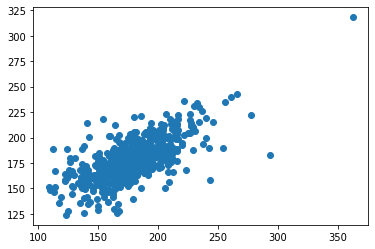

In [857]:
linear_reg_prediction = linear_reg_model.predict(data_test)
plt.scatter(label_test['TARGET_deathRate'], linear_reg_prediction)

hmmm ternyata masih ada outlier

**Menampilkan nilai MSE, MAE, RMSE, dan R2 Square**

In [858]:
MSE = metrics.mean_squared_error(label_test, linear_reg_prediction)
MAE = metrics.mean_absolute_error(label_test, linear_reg_prediction)
RMSE = np.sqrt(metrics.mean_squared_error(label_test, linear_reg_prediction))
R2_SQUARE = metrics.r2_score(label_test, linear_reg_prediction)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R2 SQUARE: {R2_SQUARE}')

MAE: 14.39816540363802
MSE: 393.69600914577865
RMSE: 19.841774344694546
R2 SQUARE: 0.4841416961000903


### Nomor 2
[15] Implementasikan Ridge Regression pada data hasil preprocessing. Gunakan method dari library sklearn.

a. Tampilkan nilai R2 Square

b. Coba ubah parameter alpha dengan nilai yang lebih besar dan analisis bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil regresi.


**Menginisiasi model Ridge Regression**

In [859]:
# alpha=1 / default
ridge_reg_model = Ridge(alpha=1)
ridge_reg_model.fit(data_train, label_train)

Ridge(alpha=1)

**Menampilkan nilai R2 Square**

In [860]:
ridge_reg_prediction = ridge_reg_model.predict(data_test)
R2_SQUARE = metrics.r2_score(label_test, ridge_reg_prediction)

print(f'R2 SQUARE: {R2_SQUARE}')

R2 SQUARE: 0.4841359431920965


**Mencoba parameter alpha dengan nilai yang lebih besar**

In [861]:
# alpha=3
ridge_reg_model_upped_tol = Ridge(alpha=3)
ridge_reg_model_upped_tol.fit(data_train, label_train)


Ridge(alpha=3)

In [862]:
ridge_reg_prediction_upped_tol = ridge_reg_model_upped_tol.predict(data_test)
R2_SQUARE_UPPED_TOL = metrics.r2_score(label_test, ridge_reg_prediction_upped_tol)

print(f'R2 SQUARE: {R2_SQUARE_UPPED_TOL}')

R2 SQUARE: 0.48411360432545736


**Analisis dampak parameter alpha pada Ridge Regression**

Mengutip dari sumber yang saya temukan di stackoverflow, nilai alpha pada regression disebut juga sebagai penalty parameter; berguna untuk menakar seberapa besar model regresi harus mencegah adanya overfitting.

Pada Ridge Regression, terlihat bahwa nilai alpha tidak begitu berdampak kepada R2 Square.

### Nomor 3
[15] Implementasikan Lasso Regression pada data hasil preprocessing. Gunakan method dari library sklearn.

a. Tampilkan nilai R2 Square

b. Coba ubah parameter alpha dengan nilai yang lebih besar dan analisis bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil regresi.


**Menginisiasi Lasso Regression**

In [863]:
# alpha=1 / default
lasso_reg_model = Lasso(alpha=1)
lasso_reg_model.fit(data_train, label_train)

Lasso(alpha=1)

**Menampilkan R2 Square**

In [864]:
lasso_reg_prediction = lasso_reg_model.predict(data_test)
R2_SQUARE = metrics.r2_score(label_test, lasso_reg_prediction)

print(f'R2 SQUARE: {R2_SQUARE}')

R2 SQUARE: 0.47570968675410186


**Mencoba parameter alpha dengan nilai yang lebih besar**

In [865]:
# alpha=3
lasso_reg_model_upped_tol = Lasso(alpha=3)
lasso_reg_model_upped_tol.fit(data_train, label_train)

Lasso(alpha=3)

In [866]:
lasso_reg_prediction_upped_tol = lasso_reg_model_upped_tol.predict(data_test)
R2_SQUARE_UPPED_TOL = metrics.r2_score(label_test, lasso_reg_prediction_upped_tol)

print(f'R2 SQUARE: {R2_SQUARE_UPPED_TOL}')

R2 SQUARE: 0.43996637765282043


**Analisis dampak parameter alpha pada Lasso Regression**

Terlihat bahwa perbedaan alpha pada Lasso memiliki dampak yang jauh lebih besar kepada nilai R2 Square-nya dibanding pada Ridge Regression.

NOTE: Parameter alpha adalah parameter yang merepresentasikan “kekuatan” dari regularisasi yang dilakukan oleh model. Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

## **Logistic and Softmax Regression**

### Nomor 1
[15] Implementasikan Logistic Regression dengan target yang digunakan adalah kolom TARGET_logistic. Gunakan method dari library sklearn.

a. Visualisasikan hasil regression yang didapat dengan membandingkan hasil prediksi dan nilai target aktual.

b. Tampilkan rata-rata akurasi yang didapat (baca method .score() pada dokumentasi sklearn)


**Mengekstrak label TARGET_logistic dan data**

In [867]:
# Mengekstrak data dan target/label
label_logistic = cancer_df_processed[['TARGET_logistic']]
data_logistic = cancer_df_normalized

display(data_logistic)

# Membagi dataset menjadi training set dan test set
# dengan jumlah training set adalah sebanyak 80% dari data keseluruhan
data_train, data_test, label_train, label_test = train_test_split(data_logistic, label_logistic, train_size=0.8)

,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,0.561518,0.761321,1.232312,0.478696,-0.886102,1.218383,-0.131848,-0.511128,-0.084151,0.140614,...,0.000000,0.042734,-0.427608,-0.857336,-0.113862,-0.448196,1.367088,-0.039818,0.245324,0.241011
1,-0.230067,-0.672179,0.088363,-0.180448,0.268698,0.173418,-0.270930,-1.410622,-1.595872,-0.325473,...,0.592879,0.254461,-0.657187,-0.644641,0.340912,-0.560060,0.380201,0.499790,-0.893428,-0.658382
2,-0.269746,-1.806881,0.189790,-0.248055,-0.355519,0.173418,-0.006012,0.847682,0.690607,0.327049,...,-0.549357,-0.666550,0.745793,0.304306,0.444328,-0.575848,-0.301959,0.217176,0.487085,-0.962391
3,0.031811,-0.327553,-0.234279,-0.081322,0.034617,-0.523226,-0.054580,0.503195,0.237090,0.094006,...,-0.904226,-0.655964,1.153933,0.942391,0.494549,-0.572892,-0.035483,-0.176530,-0.033835,-0.522020
4,-0.317360,-1.799549,0.240214,-0.280592,-0.683232,0.173418,0.066840,1.574933,1.276399,-0.325473,...,-0.504998,-0.645377,0.988126,0.566084,0.638610,-0.608154,-0.225352,-0.424035,0.423570,0.582401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,-0.339183,0.096804,-0.008497,-0.292683,-0.698838,-0.174904,-0.023673,0.292675,1.257502,-0.931387,...,0.714865,0.360325,-0.580660,-0.988226,0.405165,-0.362660,-0.354945,-0.080479,-0.027396,1.074398
3043,-0.283633,0.096804,0.128402,-0.199144,0.299909,0.173418,-0.328329,-1.965629,-2.030492,0.979572,...,0.537430,0.783778,-0.950537,-0.251974,-0.484758,-0.466635,1.069394,3.453599,0.116265,1.282386
3044,-0.277682,0.096804,0.338983,-0.206992,-0.293097,0.521740,-0.317291,-1.735971,-2.068285,1.305833,...,0.459803,0.699087,-1.231133,-0.399224,0.263556,-0.467569,0.023950,1.051192,0.594984,1.092368
3045,-0.265778,0.096804,0.305838,-0.234125,-0.558389,0.173418,-0.138471,-0.511128,-0.310909,0.187223,...,0.870120,0.889642,-0.861256,-0.857336,0.565440,-0.545784,-0.386740,0.042156,1.101742,0.978415


**Menginisiasi model Logistic Regression**

In [868]:
logistic_reg_model = LogisticRegression(max_iter=4000)
logistic_reg_model.fit(data_train, label_train)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=4000)

**Menampilkan visualisasi perbandingan aktual dan prediksi**

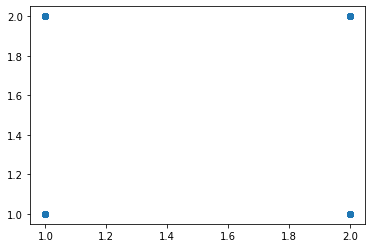

In [869]:
logistic_reg_prediction = logistic_reg_model.predict(data_test)
plt.scatter(label_test['TARGET_logistic'], logistic_reg_prediction)

**Menghitung rata-rata akurasi yang didapat**

In [870]:
logistic_mean_accuracy_score = logistic_reg_model.score(data_test, label_test)

print(f'Rata-rata akurasi Model Logistic: {logistic_mean_accuracy_score}')

Rata-rata akurasi Model Logistic: 0.8180327868852459


### Nomor 2
[15] Implementasikan Softmax Regression dengan target yang digunakan adalah kolom TARGET_softmax. Gunakan method dari library sklearn.

a. Visualisasikan hasil regression yang didapat dengan membandingkan hasil prediksi dan nilai target aktual.

b. Tampilkan rata-rata akurasi yang didapat.


**Mengekstrak label TARGET_softmax dan data**

In [871]:
# Mengekstrak data dan target/label
label_softmax = cancer_df_processed[['TARGET_softmax']]
data_softmax = cancer_df_normalized

display(data_softmax)

# Membagi dataset menjadi training set dan test set
# dengan jumlah training set adalah sebanyak 80% dari data keseluruhan
data_train, data_test, label_train, label_test = train_test_split(data_softmax, label_softmax, train_size=0.8)

,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,0.561518,0.761321,1.232312,0.478696,-0.886102,1.218383,-0.131848,-0.511128,-0.084151,0.140614,...,0.000000,0.042734,-0.427608,-0.857336,-0.113862,-0.448196,1.367088,-0.039818,0.245324,0.241011
1,-0.230067,-0.672179,0.088363,-0.180448,0.268698,0.173418,-0.270930,-1.410622,-1.595872,-0.325473,...,0.592879,0.254461,-0.657187,-0.644641,0.340912,-0.560060,0.380201,0.499790,-0.893428,-0.658382
2,-0.269746,-1.806881,0.189790,-0.248055,-0.355519,0.173418,-0.006012,0.847682,0.690607,0.327049,...,-0.549357,-0.666550,0.745793,0.304306,0.444328,-0.575848,-0.301959,0.217176,0.487085,-0.962391
3,0.031811,-0.327553,-0.234279,-0.081322,0.034617,-0.523226,-0.054580,0.503195,0.237090,0.094006,...,-0.904226,-0.655964,1.153933,0.942391,0.494549,-0.572892,-0.035483,-0.176530,-0.033835,-0.522020
4,-0.317360,-1.799549,0.240214,-0.280592,-0.683232,0.173418,0.066840,1.574933,1.276399,-0.325473,...,-0.504998,-0.645377,0.988126,0.566084,0.638610,-0.608154,-0.225352,-0.424035,0.423570,0.582401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,-0.339183,0.096804,-0.008497,-0.292683,-0.698838,-0.174904,-0.023673,0.292675,1.257502,-0.931387,...,0.714865,0.360325,-0.580660,-0.988226,0.405165,-0.362660,-0.354945,-0.080479,-0.027396,1.074398
3043,-0.283633,0.096804,0.128402,-0.199144,0.299909,0.173418,-0.328329,-1.965629,-2.030492,0.979572,...,0.537430,0.783778,-0.950537,-0.251974,-0.484758,-0.466635,1.069394,3.453599,0.116265,1.282386
3044,-0.277682,0.096804,0.338983,-0.206992,-0.293097,0.521740,-0.317291,-1.735971,-2.068285,1.305833,...,0.459803,0.699087,-1.231133,-0.399224,0.263556,-0.467569,0.023950,1.051192,0.594984,1.092368
3045,-0.265778,0.096804,0.305838,-0.234125,-0.558389,0.173418,-0.138471,-0.511128,-0.310909,0.187223,...,0.870120,0.889642,-0.861256,-0.857336,0.565440,-0.545784,-0.386740,0.042156,1.101742,0.978415


**Menginisiasi model Softmax Regression**

In [872]:
softmax_reg_model = LogisticRegression(max_iter=4000, multi_class='multinomial')
softmax_reg_model.fit(data_train, label_train)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=4000, multi_class='multinomial')

**Menampilkan visualisasi perbandingan aktual dan prediksi**

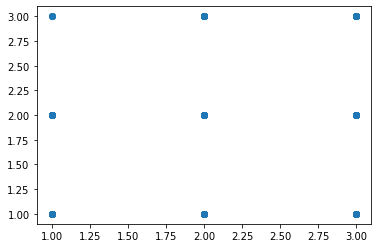

In [873]:
softmax_reg_prediction = softmax_reg_model.predict(data_test)
plt.scatter(label_test['TARGET_softmax'], softmax_reg_prediction)

**Menghitung rata-rata akurasi yang didapat**

In [874]:
softmax_mean_accuracy_score = softmax_reg_model.score(data_test, label_test)

print(f'Rata-rata akurasi Model Softmax: {softmax_mean_accuracy_score}')

Rata-rata akurasi Model Softmax: 0.6278688524590164
